In [367]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/week-4-nashville-housing-datacsv/week 4 - Nashville_housing_data.csv


**<h1>Introduction</h1>**
Buying a property is a complicated undertaking since it involves several factors. After assessing each of the circumstances, such as the number of beds, baths, land areas, and so on. When these expectations are met, the most important factor is the price. The worth of a property is determined by its qualities, after which it is determined if it is overpriced or underpriced.<br>
To start with, we will clean the dataset in this project. That is, we will check for null values and take appropriate action on the columns with null values, and then we will check for values in different columns to gain knowledge of the dataset. Following that, we will enter the exploratory data analysis phase, where we will plot several sorts of graphs and explore their relationships. Data preparation will take place during the feature engineering stage, and we will alter the data so that we may go on to the modeling step. We will utilize four models in the modeling stage: Logistic Regression, Decision Trees, Random Forest Classifier, and Gradient Boosting Classifier. Finally, we will compare the results and select the best-performing model from the group.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

<h1> Data Analysis</h1>

In [2]:
#Reading the CSV File
df = pd.read_csv("/kaggle/input/week-4-nashville-housing-datacsv/week 4 - Nashville_housing_data.csv")
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [4]:
#Checking the number of null values present in the data set. 
df.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [5]:
#Now we are calculating the percentage of null values present in the data set(column wise).
print('Percentage of Null values with respect to columns in the dataset')
100* df.isnull().sum()/len(df)

Percentage of Null values with respect to columns in the dataset


Unnamed: 0                             0.000000
Parcel ID                              0.000000
Land Use                               0.000000
Property Address                       0.008830
Suite/ Condo   #                     100.000000
Property City                          0.008830
Sale Date                              0.000000
Legal Reference                        0.000000
Sold As Vacant                         0.000000
Multiple Parcels Involved in Sale      0.000000
City                                   0.000000
State                                  0.000000
Acreage                                0.000000
Tax District                           0.000000
Neighborhood                           0.000000
Land Value                             0.000000
Building Value                         0.000000
Finished Area                          0.004415
Foundation Type                        0.004415
Year Built                             0.000000
Exterior Wall                          0

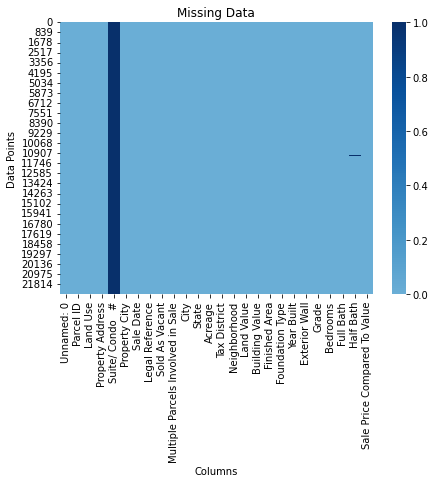

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.isnull(), ax=ax, cmap="Blues", center=0).set(
            title = 'Missing Data', 
            xlabel = 'Columns', 
            ylabel = 'Data Points');

In [7]:
# creating Year, Month, Age column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
df['Sale Date']= pd.to_datetime(df['Sale Date'])

# create Year, Month, Day columns
df['Year'] = df["Sale Date"].dt.year
df['Month'] = df["Sale Date"].dt.month
df['Day'] = df["Sale Date"].dt.day
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,20130118-0006337,No,No,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,11
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,20130124-0008033,No,No,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,20130128-0008863,No,No,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,20130131-0009929,No,No,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,23
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,20130118-0006110,No,No,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,4


In [8]:
df.shape

(22651, 29)

In [9]:
data = df.copy()
data.drop(['Suite/ Condo   #'], axis=1,inplace=True)


In [10]:
data.shape

(22651, 28)

In [11]:
#Dropping NaN values
data.dropna(inplace=True)

In [12]:
data.isna().sum()

Unnamed: 0                           0
Parcel ID                            0
Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
City                                 0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
Year                     

In [13]:
#Checking the distribution of the dataset
data.describe()

,Unnamed: 0,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Year,Month,Day
count,22536.000000,22536.000000,22536.000000,2.253600e+04,2.253600e+04,22536.000000,22536.000000,22536.000000,22536.000000,22536.000000,22536.000000,22536.00000,22536.000000
mean,27849.238552,0.455580,4435.710153,7.021012e+04,1.720595e+05,1914.249596,1961.907171,3.104455,1.884540,0.270190,2014.562345,6.59842,17.145678
std,16597.795178,0.613062,2142.333791,1.030406e+05,1.898144e+05,1077.880089,25.770276,0.830528,0.951348,0.480173,1.082618,3.07661,9.036427
min,1.000000,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000,2013.000000,1.00000,1.000000
25%,13285.750000,0.200000,3130.000000,2.200000e+04,8.547500e+04,1248.000000,1947.000000,3.000000,1.000000,0.000000,2014.000000,4.00000,10.000000
50%,27547.000000,0.280000,4026.000000,3.000000e+04,1.185500e+05,1643.250000,1959.000000,3.000000,2.000000,0.000000,2015.000000,7.00000,17.000000
75%,42292.250000,0.460000,6229.000000,6.030000e+04,1.878000e+05,2212.500000,1977.000000,4.000000,2.000000,1.000000,2015.000000,9.00000,25.000000
max,56615.000000,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000,2016.000000,12.00000,31.000000


In [16]:
#Checking values in different columns in the dataset
print(data['Land Use'].value_counts())
print(data['Bedrooms'].value_counts())
print(data['Grade'].value_counts())
print(data['Foundation Type'].value_counts())
print(data['Full Bath'].value_counts())
print(data['Half Bath'].value_counts())
print(data['Sold As Vacant'].value_counts())

SINGLE FAMILY             21282
DUPLEX                     1184
RESIDENTIAL COMBO/MISC       36
QUADPLEX                     34
Name: Land Use, dtype: int64
3.0     12192
4.0      4621
2.0      4572
5.0       819
6.0       194
1.0        79
7.0        29
8.0        21
0.0         4
10.0        2
9.0         2
11.0        1
Name: Bedrooms, dtype: int64
C       16162
B        3375
D        1911
A         547
X         482
E          57
SSC         1
OFB         1
Name: Grade, dtype: int64
CRAWL        14148
FULL BSMT     3802
PT BSMT       3121
SLAB          1427
PIERS           36
TYPICAL          2
Name: Foundation Type, dtype: int64
2.0     9210
1.0     8900
3.0     3090
4.0      915
5.0      304
6.0       80
7.0       15
0.0        9
8.0        6
10.0       4
9.0        3
Name: Full Bath, dtype: int64
0.0    16800
1.0     5406
2.0      307
3.0       23
Name: Half Bath, dtype: int64
No     22402
Yes      134
Name: Sold As Vacant, dtype: int64


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


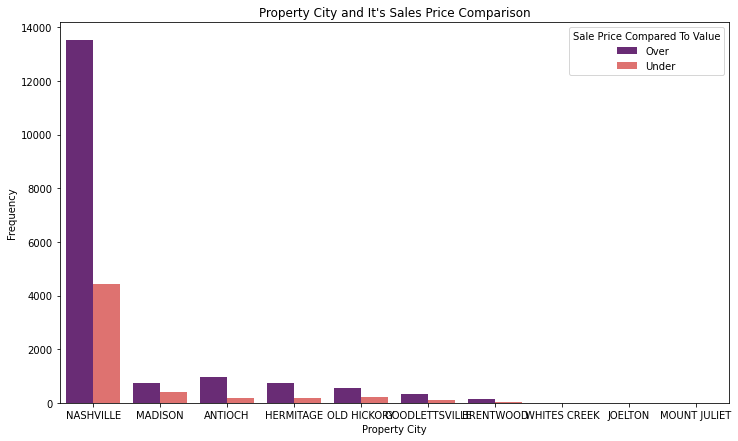

In [380]:
df = data.copy()
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
plt.figure(figsize=(12,7))
sns.countplot("Property City", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Property City'].value_counts().index)
plt.title("Property City and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Property City")
plt.show()

In [381]:
df.columns

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Property City', 'Sale Date', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'City', 'State', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value', 'Year', 'Month', 'Day'],
      dtype='object')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


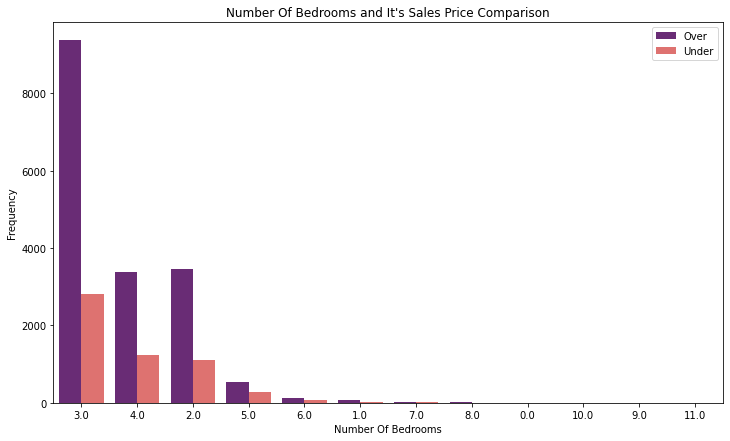

In [382]:

plt.figure(figsize=(12,7))
sns.countplot("Bedrooms", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Bedrooms'].value_counts().index)
plt.title("Number Of Bedrooms and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Number Of Bedrooms")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


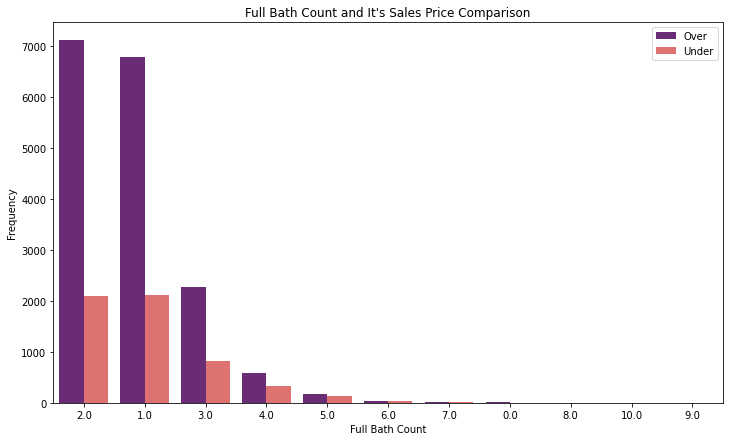

In [383]:
plt.figure(figsize=(12,7))
sns.countplot("Full Bath", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Full Bath'].value_counts().index)
plt.title("Full Bath Count and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Full Bath Count")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


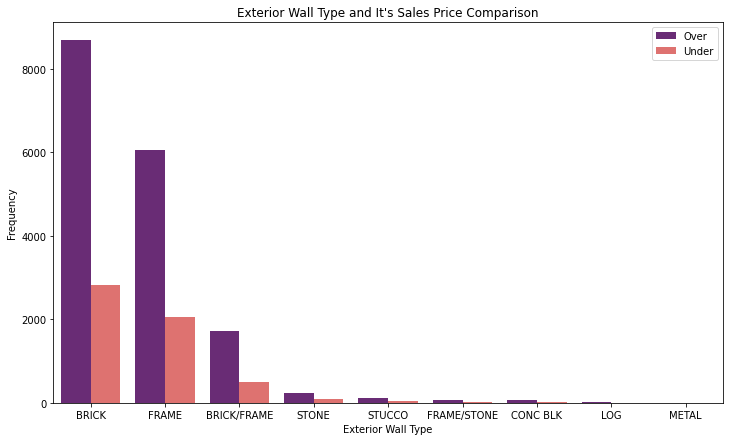

In [384]:
plt.figure(figsize=(12,7))
sns.countplot("Exterior Wall", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Exterior Wall'].value_counts().index)
plt.title("Exterior Wall Type and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Exterior Wall Type")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


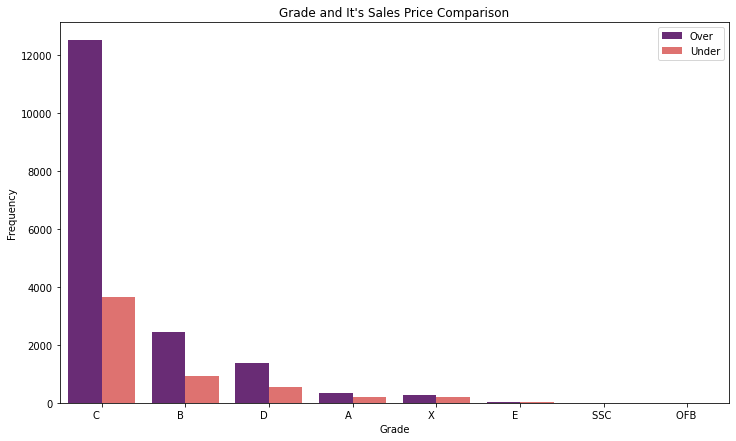

In [385]:
plt.figure(figsize=(12,7))
sns.countplot("Grade", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Grade'].value_counts().index)
plt.title("Grade and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Grade")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


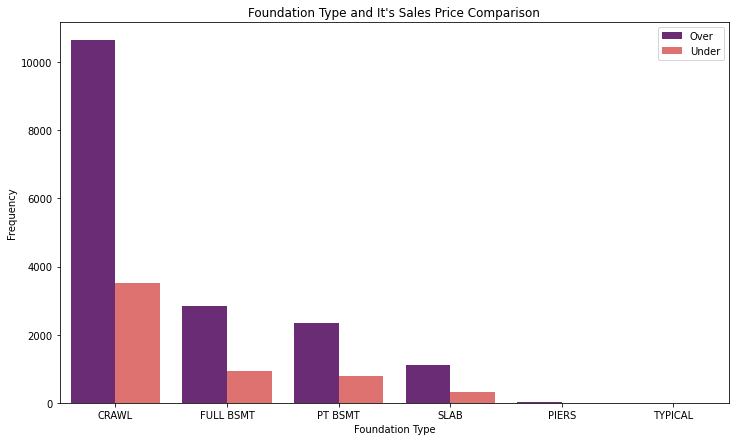

In [386]:
plt.figure(figsize=(12,7))
sns.countplot("Foundation Type", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Foundation Type'].value_counts().index)
plt.title("Foundation Type and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Foundation Type")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


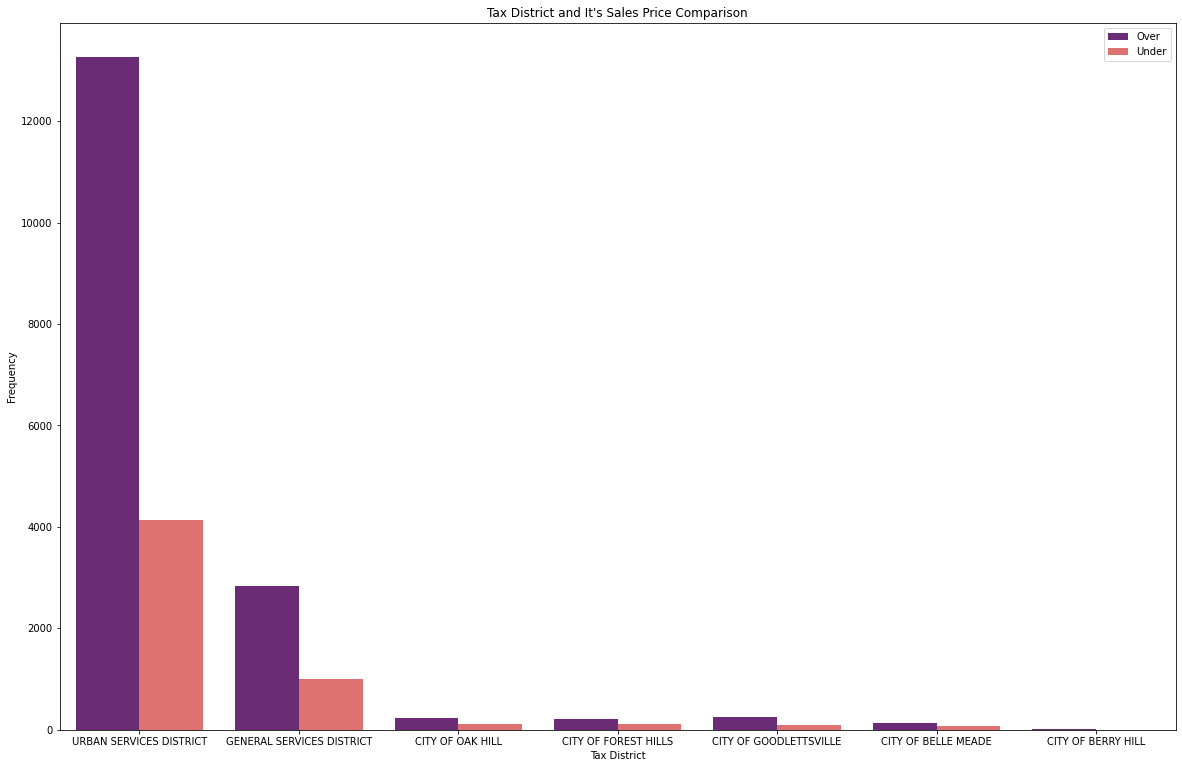

In [387]:
plt.figure(figsize=(20,13))
sns.countplot("Tax District", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Tax District'].value_counts().index)
plt.title("Tax District and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Tax District")
plt.legend(loc='upper right')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


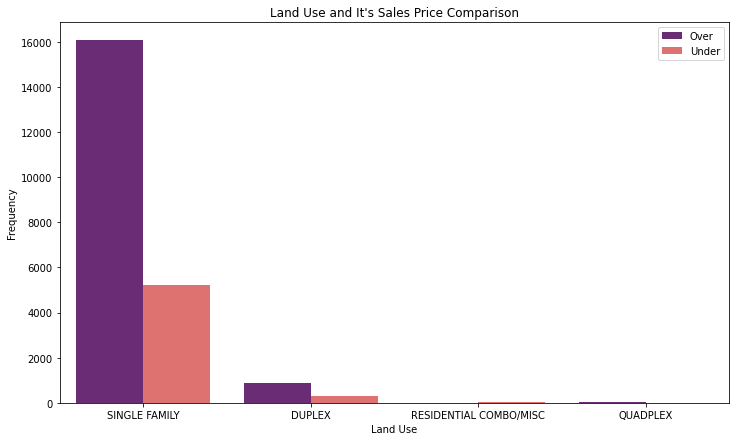

In [388]:
plt.figure(figsize=(12,7))
sns.countplot("Land Use", data = df, palette='magma',hue='Sale Price Compared To Value',order=df['Land Use'].value_counts().index)
plt.title("Land Use and It's Sales Price Comparison")
plt.ylabel('Frequency')
plt.xlabel("Land Use")
plt.legend(loc='upper right')
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

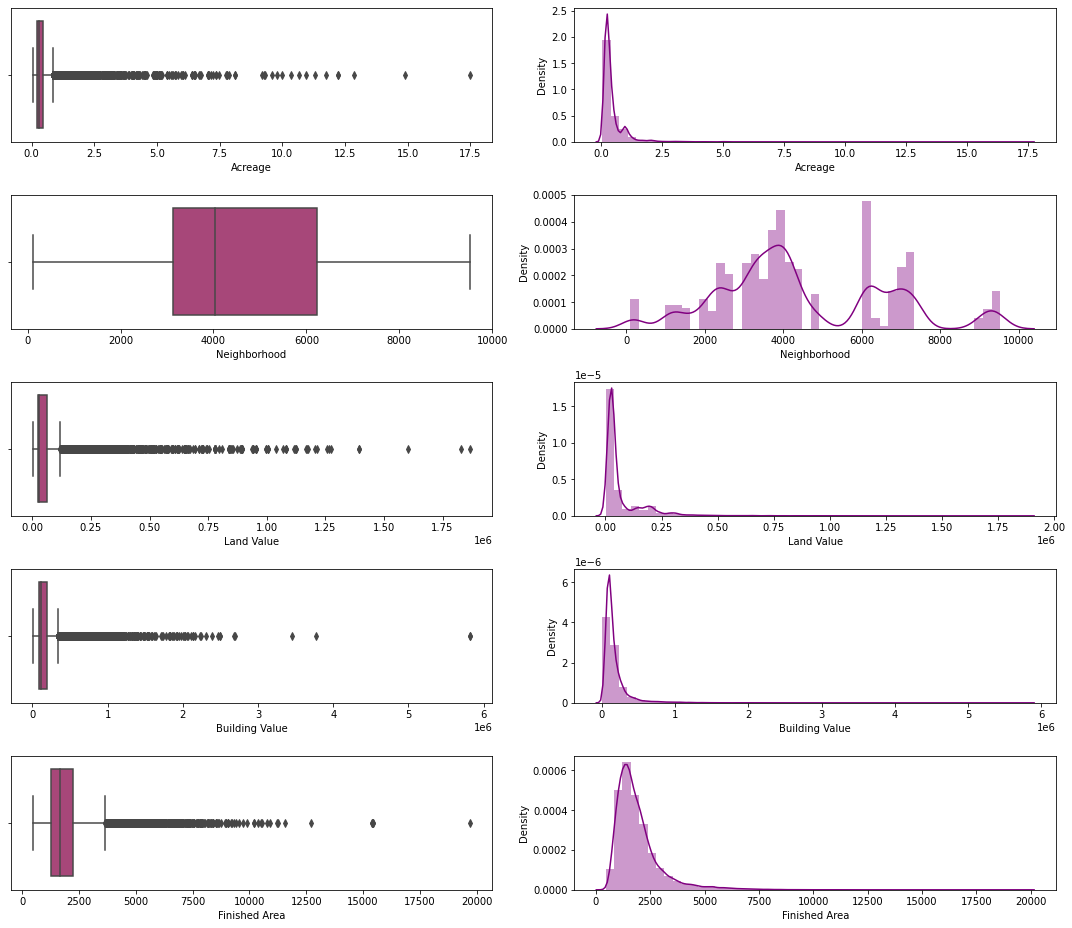

In [389]:
fig, ax = plt.subplots(5, 2, figsize = (15, 13))
sns.boxplot(x= df["Acreage"], ax = ax[0,0],palette='magma')
sns.distplot(df['Acreage'], ax = ax[0,1],color='purple')

sns.boxplot(x= df["Neighborhood"], ax = ax[1,0],palette='magma')
sns.distplot(df['Neighborhood'], ax = ax[1,1],color='purple')

sns.boxplot(x= df["Land Value"], ax = ax[2,0],palette='magma')
sns.distplot(df['Land Value'], ax = ax[2,1],color='purple')

sns.boxplot(x= df["Building Value"], ax = ax[3,0],palette='magma')
sns.distplot(df['Building Value'], ax = ax[3,1],color='purple')

sns.boxplot(x= df["Finished Area"], ax = ax[4,0],palette='magma')
sns.distplot(df['Finished Area'], ax = ax[4,1],color='purple')



plt.tight_layout()

In [390]:
df['Year'].value_counts()

2015    6387
2014    5716
2016    5573
2013    4860
Name: Year, dtype: int64

[Text(0, 0.5, 'Acreage')]

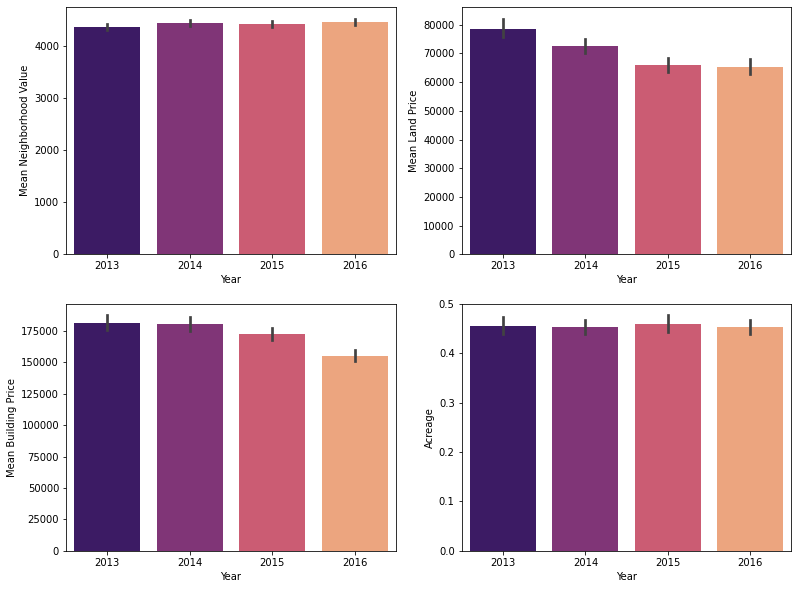

In [391]:
f, axarr = plt.subplots(2, 2, figsize=(13,10))
Nashville = df.copy()

land_price = Nashville[["Year", "Land Value"]].groupby(['Year'], as_index = False).mean()
sns.barplot(x= 'Year', y = 'Land Value', data=Nashville,palette='magma', ax=axarr[0,1]).set(ylabel='Mean Land Price')

sale_price = Nashville[["Year", "Neighborhood"]].groupby(['Year'], as_index = False).mean()
sns.barplot(x= 'Year', y = 'Neighborhood', data=Nashville,palette='magma', ax=axarr[0,0]).set(ylabel='Mean Neighborhood Value')

building_price = Nashville[["Year", "Building Value"]].groupby(['Year'], as_index = False).mean()
sns.barplot(x= 'Year', y = 'Building Value', data=Nashville,palette='magma', ax=axarr[1,0]).set(ylabel='Mean Building Price')

acreage = Nashville[["Year", "Acreage"]].groupby(['Year'], as_index = False).mean()
sns.barplot(x= 'Year', y = 'Acreage', data=Nashville, ax=axarr[1,1],palette='magma').set(ylabel='Acreage')

Results are a bit mixed here; this could be a result of some outliers that need to be removed, the sparseness of the data set, or a mix of both. A deeper dive into the data is needed here. I will start by separating sale prices by time of year.

<AxesSubplot:xlabel='Month', ylabel='count'>

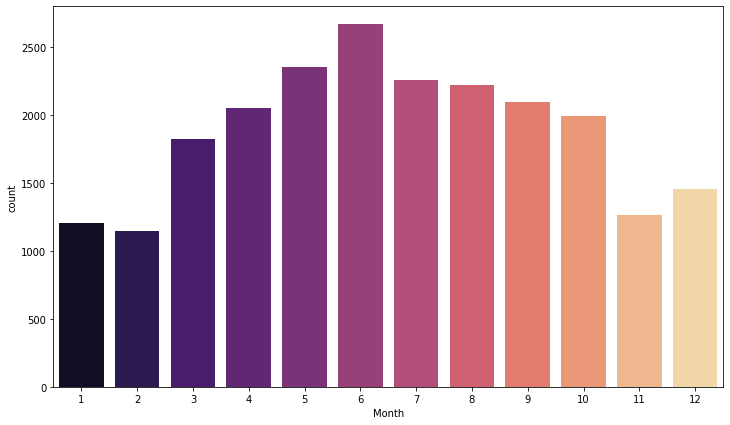

In [392]:

plt.figure(figsize=(12,7))
sns.countplot(x= 'Month', data=Nashville,palette='magma')

<AxesSubplot:xlabel='Month', ylabel='count'>

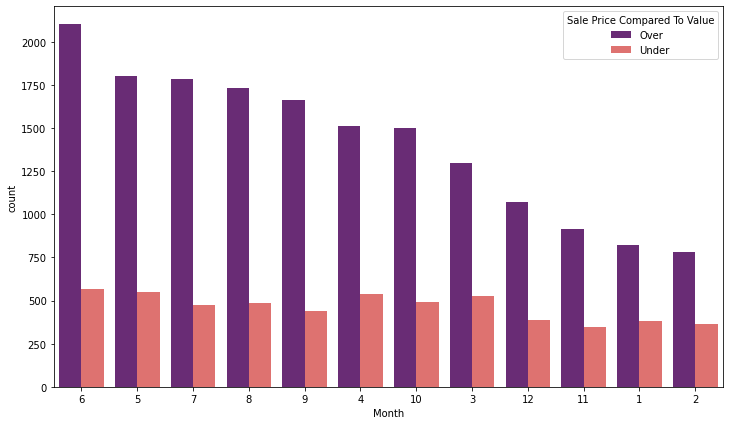

In [393]:

plt.figure(figsize=(12,7))
sns.countplot(x= 'Month',hue = 'Sale Price Compared To Value', data=Nashville,palette='magma', 
            order=df['Month'].value_counts().index)

In [394]:
df.columns

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Property City', 'Sale Date', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'City', 'State', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value', 'Year', 'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='Sold As Vacant', ylabel='count'>

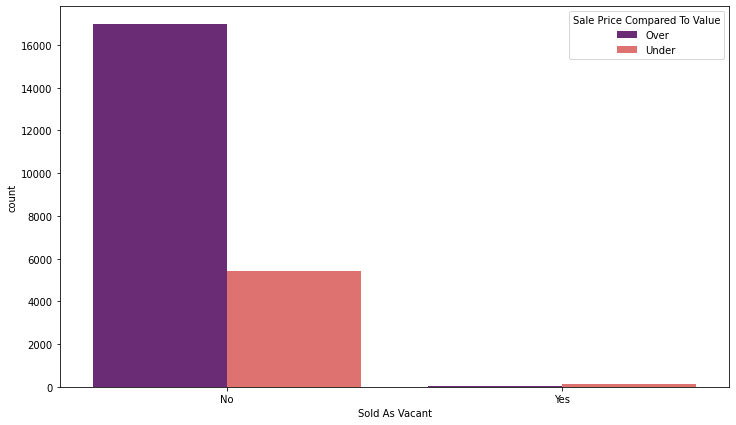

In [395]:
plt.figure(figsize=(12,7))
sns.countplot(x= 'Sold As Vacant',hue = 'Sale Price Compared To Value', data=Nashville,palette='magma', 
            order=df['Sold As Vacant'].value_counts().index)

<AxesSubplot:xlabel='Multiple Parcels Involved in Sale', ylabel='count'>

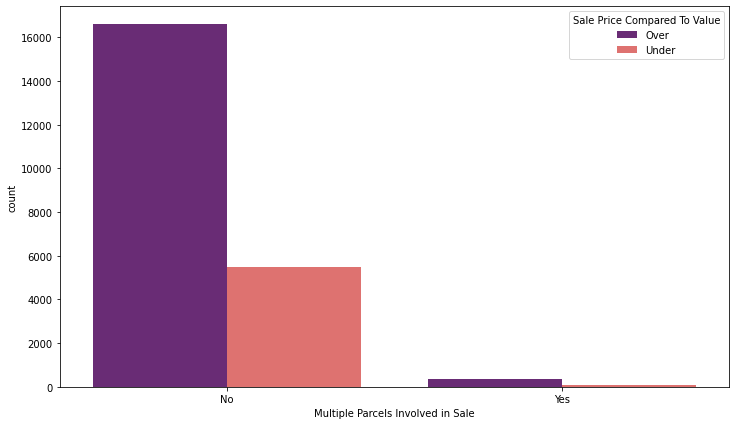

In [396]:
plt.figure(figsize=(12,7))
sns.countplot(x= 'Multiple Parcels Involved in Sale',hue = 'Sale Price Compared To Value', data=Nashville,palette='magma', 
            order=df['Multiple Parcels Involved in Sale'].value_counts().index)

# Feature Engineering

In [397]:
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,20130118-0006337,No,No,NASHVILLE,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,11
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,20130124-0008033,No,No,NASHVILLE,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,20130128-0008863,No,No,NASHVILLE,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,20130131-0009929,No,No,NASHVILLE,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,23
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,20130118-0006110,No,No,NASHVILLE,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,4


In [398]:
df.drop(['Unnamed: 0','Parcel ID','Property Address','Sale Date','Legal Reference'], axis=1, inplace=True)

In [399]:
df.head()

,Land Use,Property City,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,Land Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
0,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127,32000,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,11
1,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126,34000,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18
2,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18
3,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130,25000,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,23
4,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,4


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22536 non-null  object 
 1   Property City                      22536 non-null  object 
 2   Sold As Vacant                     22536 non-null  object 
 3   Multiple Parcels Involved in Sale  22536 non-null  object 
 4   City                               22536 non-null  object 
 5   State                              22536 non-null  object 
 6   Acreage                            22536 non-null  float64
 7   Tax District                       22536 non-null  object 
 8   Neighborhood                       22536 non-null  int64  
 9   Land Value                         22536 non-null  int64  
 10  Building Value                     22536 non-null  int64  
 11  Finished Area                      22536 non-null  flo

In [401]:
#Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
cols = df.select_dtypes(exclude=["number"])
le = LabelEncoder()

for feat in cols:
    df[feat] = le.fit_transform(df[feat].astype(str))

df.head()

,Land Use,Property City,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,Land Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
0,3,7,0,0,7,0,0.17,6,3127,32000,...,1941,0,2,2.0,1.0,0.0,0,2013,1,11
1,3,7,0,0,7,0,0.11,1,9126,34000,...,2000,1,2,3.0,2.0,1.0,0,2013,1,18
2,3,7,0,0,7,0,0.17,6,3130,25000,...,1948,1,1,4.0,2.0,0.0,1,2013,1,18
3,3,7,0,0,7,0,0.34,6,3130,25000,...,1910,3,2,2.0,1.0,0.0,1,2013,1,23
4,3,7,0,0,7,0,0.17,6,3130,25000,...,1945,3,2,2.0,1.0,0.0,1,2013,1,4


In [402]:
df.shape

(22536, 23)

In [403]:
cols = df.select_dtypes(exclude=["bool_","object_"])
cols

,Land Use,Property City,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,Land Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Year,Month,Day
0,3,7,0,0,7,0,0.17,6,3127,32000,...,1941,0,2,2.0,1.0,0.0,0,2013,1,11
1,3,7,0,0,7,0,0.11,1,9126,34000,...,2000,1,2,3.0,2.0,1.0,0,2013,1,18
2,3,7,0,0,7,0,0.17,6,3130,25000,...,1948,1,1,4.0,2.0,0.0,1,2013,1,18
3,3,7,0,0,7,0,0.34,6,3130,25000,...,1910,3,2,2.0,1.0,0.0,1,2013,1,23
4,3,7,0,0,7,0,0.17,6,3130,25000,...,1945,3,2,2.0,1.0,0.0,1,2013,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,3,0,0,0,0,0,0.38,6,6328,25000,...,1996,1,2,3.0,2.0,0.0,0,2016,10,13
22647,3,0,0,0,0,0,0.27,6,6328,25000,...,1996,1,2,3.0,3.0,0.0,0,2016,10,26
22648,3,0,0,0,0,0,0.23,6,6328,25000,...,1995,1,2,3.0,3.0,0.0,0,2016,10,28
22649,3,7,0,0,7,0,0.15,6,126,40000,...,2004,3,1,3.0,2.0,1.0,0,2016,10,28


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

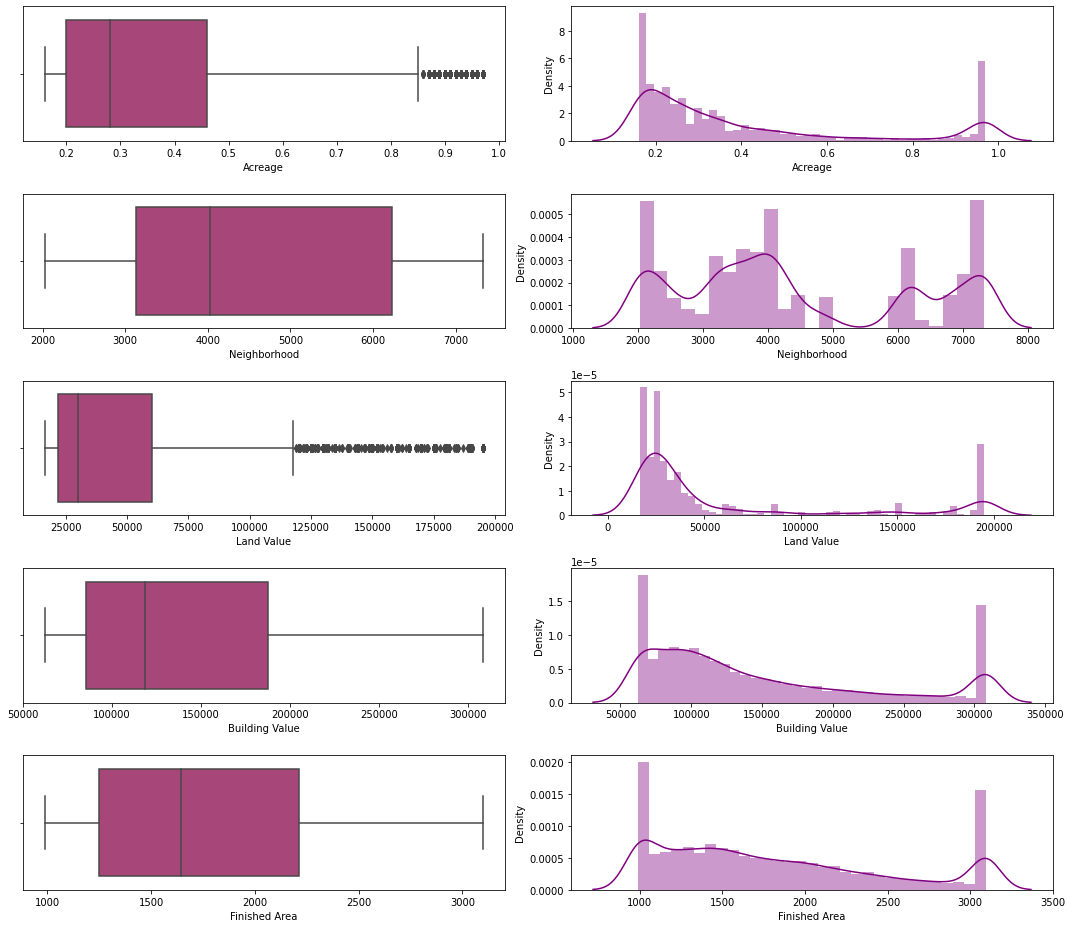

In [404]:
#Removal of Outliers
cols = df.select_dtypes(exclude=["bool_","object_"])
predict = df.copy()
for feat in cols:
    predict[feat]=predict[feat].clip(lower=predict[feat].quantile(0.10), upper=predict[feat].quantile(0.90))
    
df1 = predict.copy()
fig, ax = plt.subplots(5, 2, figsize = (15, 13))
sns.boxplot(x= df1["Acreage"], ax = ax[0,0],palette='magma')
sns.distplot(df1['Acreage'], ax = ax[0,1],color='purple')

sns.boxplot(x= df1["Neighborhood"], ax = ax[1,0],palette='magma')
sns.distplot(df1['Neighborhood'], ax = ax[1,1],color='purple')

sns.boxplot(x= df1["Land Value"], ax = ax[2,0],palette='magma')
sns.distplot(df1['Land Value'], ax = ax[2,1],color='purple')

sns.boxplot(x= df1["Building Value"], ax = ax[3,0],palette='magma')
sns.distplot(df1['Building Value'], ax = ax[3,1],color='purple')

sns.boxplot(x= df1["Finished Area"], ax = ax[4,0],palette='magma')
sns.distplot(df1['Finished Area'], ax = ax[4,1],color='purple')



plt.tight_layout()

In [405]:
#Dropping columns which are not required for modelling
df.drop(['City','State'],inplace = True,axis=1)

<AxesSubplot:>

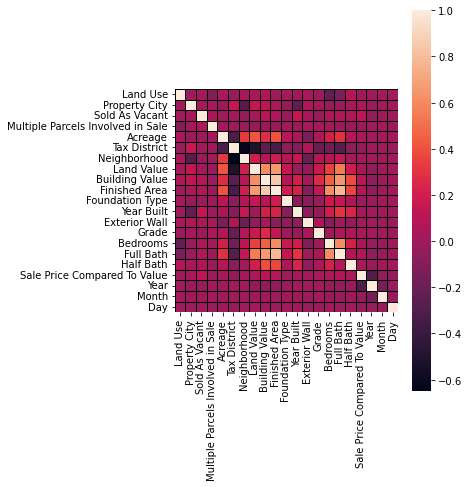

In [406]:
corr = df.select_dtypes(include=['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(5,7))
sns.heatmap(corr,vmax=1, square=True,linecolor="black",linewidths=0.7)

# Modelling

<h2> Logistic Regression</h2>

In [407]:
df.columns

Index(['Land Use', 'Property City', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District',
       'Neighborhood', 'Land Value', 'Building Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath', 'Sale Price Compared To Value', 'Year',
       'Month', 'Day'],
      dtype='object')

In [408]:
y=df['Sale Price Compared To Value']#specify the dependent variable and independent variable
x=df.drop(['Sale Price Compared To Value'],axis=1)

In [409]:
#deviding the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

In [410]:
#size of train and test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16902, 20)
(16902,)
(5634, 20)
(5634,)


In [411]:
#Create the constant

import statsmodels.api as sm
from scipy import stats
Xlog2=sm.add_constant(x)
logr_model = sm.Logit(y, Xlog2)# Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.493311
         Iterations 8
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                22536
Model:                                    Logit   Df Residuals:                    22515
Method:                                     MLE   Df Model:                           20
Date:                          Sun, 04 Dec 2022   Pseudo R-squ.:                  0.1168
Time:                                  23:52:50   Log-Likelihood:                -11117.
converged:                                 True   LL-Null:                       -12587.
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [412]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print('Logistic Regression Results')
ans = accuracy_score(y_test, y_pred)
ans1 = round(ans*100,3)
print('Acurracy score of Logistic Regression Model is {ans}'.format(ans=ans1))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))#classification report for logistic model prediction
from sklearn.metrics import f1_score
precision1 = metrics.precision_score(y_test, y_pred)
recall1 = metrics.recall_score(y_test, y_pred)
f1score1 = f1_score(y_test, y_pred, average='weighted')

Logistic Regression Results
Acurracy score of Logistic Regression Model is 75.311
Confusion Matrix
[[4227   14]
 [1377   16]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4241
           1       0.53      0.01      0.02      1393

    accuracy                           0.75      5634
   macro avg       0.64      0.50      0.44      5634
weighted avg       0.70      0.75      0.65      5634



X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

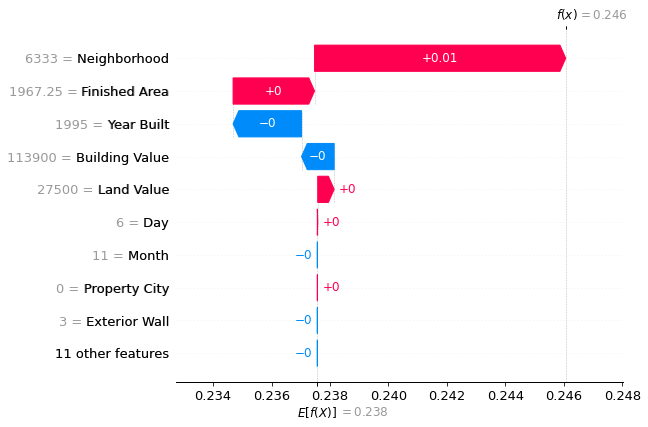

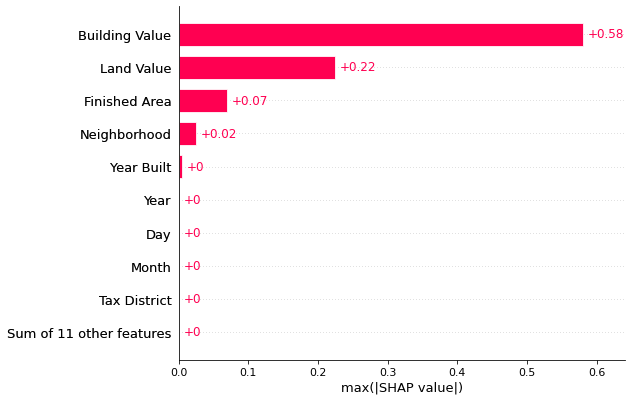

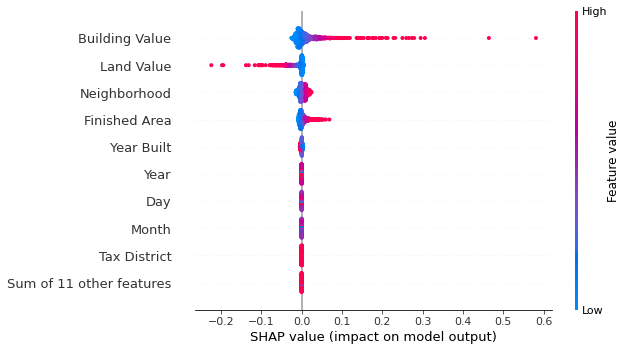

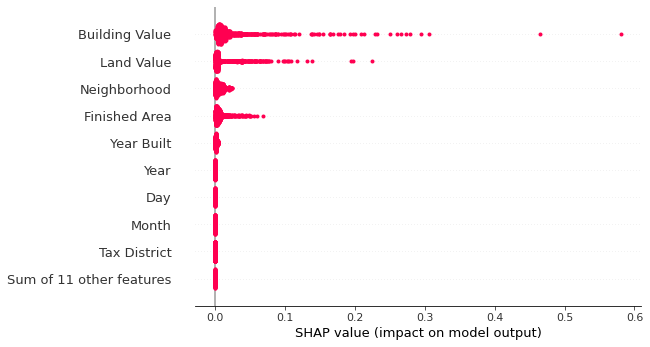

In [413]:
#feature importance of Logistic Regression Model
import shap
f = lambda x: logreg.predict_proba(x)[:,1]
med = x_train.median().values.reshape((1,x_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(x_test.iloc[0:1000,:])
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values.abs.max(0))
shap.plots.beeswarm(shap_values)
shap.plots.beeswarm(shap_values.abs, color="shap_red")

<h2> Decision Trees Classifier</h2>

In [414]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier1= DecisionTreeClassifier()  
classifier1.fit(x_train, y_train) 
#Predicting the test set result  
y_pred= classifier1.predict(x_test)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print('Decision Trees Results')
ans = accuracy_score(y_test, y_pred)
ans2 = round(ans*100,3)
print('Acurracy score of Decision Trees Model is {ans}'.format(ans=ans2))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))#classification report for Decision Tree model prediction
precision2 = metrics.precision_score(y_test, y_pred)
recall2 = metrics.recall_score(y_test, y_pred)
f1score2 = f1_score(y_test, y_pred, average='weighted')

Decision Trees Results
Acurracy score of Decision Trees Model is 70.678
Confusion Matrix
[[3361  880]
 [ 772  621]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4241
           1       0.41      0.45      0.43      1393

    accuracy                           0.71      5634
   macro avg       0.61      0.62      0.62      5634
weighted avg       0.71      0.71      0.71      5634



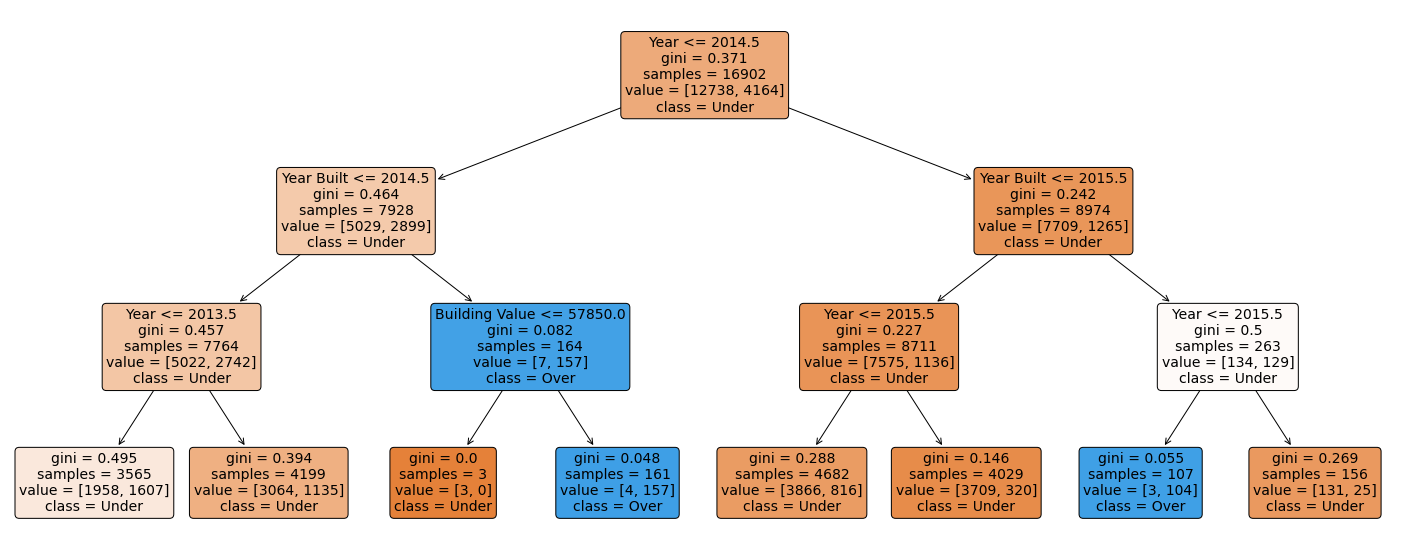

In [415]:
from sklearn import tree

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=x.columns.values.tolist(),class_names=['Under','Over'],filled=True,rounded=True,fontsize=14)

<AxesSubplot:>

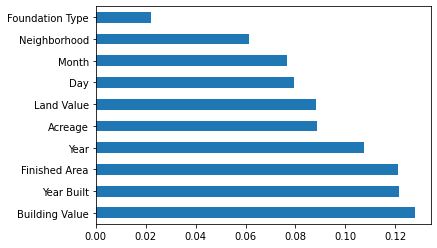

In [416]:
feat_importances = pd.Series(classifier1.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

<h2>Random Forest Model</h2>

Random Forest Classifier Results
Acurracy score of Random Forest Classifier Model is 78.63
Confusion Matrix
[[4030  211]
 [ 993  400]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4241
           1       0.65      0.29      0.40      1393

    accuracy                           0.79      5634
   macro avg       0.73      0.62      0.63      5634
weighted avg       0.77      0.79      0.75      5634



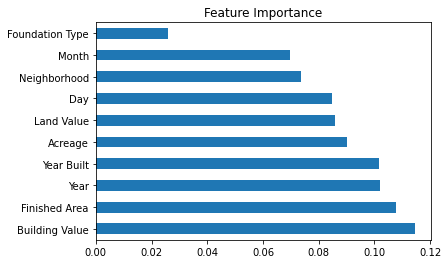

In [417]:
from sklearn.ensemble import RandomForestClassifier  
classifier2= RandomForestClassifier(n_estimators=50, criterion="entropy")  
classifier2.fit(x_train, y_train)  
#Predicting the test set result  
y_pred= classifier2.predict(x_test) 
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print('Random Forest Classifier Results')
ans = accuracy_score(y_test, y_pred)
ans3 = round(ans*100,3)
print('Acurracy score of Random Forest Classifier Model is {ans}'.format(ans=ans3))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))#classification report for RandomForestClassifier model prediction
feat_importances = pd.Series(classifier2.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh').set(title='Feature Importance')
precision3 = metrics.precision_score(y_test, y_pred)
recall3 = metrics.recall_score(y_test, y_pred)
f1score3 = f1_score(y_test, y_pred, average='weighted')

<h2>Gradient Boosting Classifier</h2>

Gradient Boosting Classifier Results
Acurracy score of Gradient Boosting Classifier Model is 78.08
Confusion Matrix
[[4040  201]
 [1034  359]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4241
           1       0.64      0.26      0.37      1393

    accuracy                           0.78      5634
   macro avg       0.72      0.61      0.62      5634
weighted avg       0.76      0.78      0.74      5634



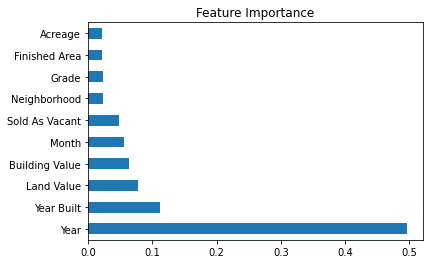

In [421]:
from sklearn.ensemble import GradientBoostingClassifier
classifier3 = GradientBoostingClassifier(n_estimators=60, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
classifier3.fit(x_train, y_train)  
#Predicting the test set result  
y_pred= classifier3.predict(x_test) 
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print('Gradient Boosting Classifier Results')
ans = accuracy_score(y_test, y_pred)
ans4 = round(ans*100,3)
print('Acurracy score of Gradient Boosting Classifier Model is {ans}'.format(ans=ans4))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))#classification report for Gradient Boosting Classifier model prediction
feat_importances = pd.Series(classifier3.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh').set(title='Feature Importance')

precision4 = metrics.precision_score(y_test, y_pred)
recall4 = metrics.recall_score(y_test, y_pred)
f1score4 = f1_score(y_test, y_pred, average='weighted')

In [419]:
import pandas as pd
df_score = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_score

,Model Name,Accuracy,Precision,Recall,F1-Score


In [420]:

df_score.at[0,'Model Name'] = 'Logistic Regression'
df_score.at[0,'Accuracy'] = ans1
df_score.at[0,'Precision'] = precision1
df_score.at[0,'Recall'] = recall1
df_score.at[0,'F1-Score'] = f1score1

df_score.at[1,'Model Name'] = 'Decision Trees Classifier'
df_score.at[1,'Accuracy'] = ans2
df_score.at[1,'Precision'] = precision2
df_score.at[1,'Recall'] = recall2
df_score.at[1,'F1-Score'] = f1score2

df_score.at[2,'Model Name'] = 'Random Forest Classifier'
df_score.at[2,'Accuracy'] = ans3
df_score.at[2,'Precision'] = precision3
df_score.at[2,'Recall'] = recall3
df_score.at[2,'F1-Score'] = f1score3

df_score.at[3,'Model Name'] = 'Gradient Boosting Classifier'
df_score.at[3,'Accuracy'] = ans4
df_score.at[3,'Precision'] = precision4
df_score.at[3,'Recall'] = recall4
df_score.at[3,'F1-Score'] = f1score4

df_score

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,75.311,0.533333,0.011486,0.651955
1,Decision Trees Classifier,70.678,0.413724,0.4458,0.710361
2,Random Forest Classifier,78.63,0.654664,0.28715,0.753622
3,Gradient Boosting Classifier,78.08,0.641071,0.257717,0.743848


<h1>Conclusion</h1>
After completing the case study, the following approach can help the Real Estate firm to invest in Nashville:<br>
•	The company should target areas with lower Finished Area values since the possibilities of obtaining an underpriced contract are better. The investment firm must hunt for a home with a low completed area since this will correspond to overpricing. They should first determine how much money they need to invest and how many finished square feet may be accommodated in order to receive a fair bargain. After considering these factors, they must determine if it is overpriced or underpriced. With this method, the corporation has a better chance of obtaining a lower-priced deal.<br>
•	Aside from the typical restrictions, time is an essential component of real estate investing. Prices are also affected by the passage of time. The corporation should aim to invest in the months of February or November, as our analysis shows that there are better possibilities of acquiring a deal at a lower price. Furthermore, the company should target unoccupied homes. As a result, whether it is a vacant property and the closing date is in November or February. There is a good probability of receiving a good bargain.
